<a href="https://colab.research.google.com/github/ejay34/yandex_praktikum_projects/blob/main/06.%20%D0%92%D0%BE%D1%81%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%B0%20%D0%B8%D0%B7%20%D1%80%D1%83%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Восстановление золота из руды

Компании "Цифры", разрабатывающей решения для эффективной работы промышленных предприятий, требуется подготовить прототип модели машинного обучения.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды и оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

*Цель исследования:* Построить прототип модели машинного обучения, которая сможет предсказывать коэффициент обогащения и поможет оптимизировать производство.

*Этапы исследования:*
1. Подготовка данных
2. Исследовательский анализ данных
3. Построение и обучение различных моделей
4. Проверка лучшей модели на тестовой выборке
5. Итоговый вывод

*Описание данных:*

Технологический процесс
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, - Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации)
- Sulphate — сульфат (на данном производстве сульфид натрия)
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов:
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Наименование признаков: [этап].[тип_параметра].[название_параметра]

Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Проверка-правильности-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-правильности-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка правильности расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Найдем-и-заполним-пропуски-значений" data-toc-modified-id="Найдем-и-заполним-пропуски-значений-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Найдем и заполним пропуски значений</a></span></li><li><span><a href="#Заменим-тип-данных" data-toc-modified-id="Заменим-тип-данных-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Заменим тип данных</a></span></li><li><span><a href="#Поищем-полные-дубликаты" data-toc-modified-id="Поищем-полные-дубликаты-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Поищем полные дубликаты</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-на-разных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-на-разных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов на разных этапах очистки</a></span></li><li><span><a href="#Подготовим-обучающую-и-тестовую-выборки" data-toc-modified-id="Подготовим-обучающую-и-тестовую-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовим обучающую и тестовую выборки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-веществ-на-разных-стадиях" data-toc-modified-id="Исследуем-суммарную-концентрацию-веществ-на-разных-стадиях-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследуем суммарную концентрацию веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция вычисления итоговой sMAPE</a></span></li><li><span><a href="#Выбор-моделей-для-обучения" data-toc-modified-id="Выбор-моделей-для-обучения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выбор моделей для обучения</a></span><ul class="toc-item"><li><span><a href="#Модель-DecisionTreeRegressor" data-toc-modified-id="Модель-DecisionTreeRegressor-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель DecisionTreeRegressor</a></span></li><li><span><a href="#Модель-RandomForestRegressor" data-toc-modified-id="Модель-RandomForestRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель RandomForestRegressor</a></span></li><li><span><a href="#Модель-LinearRegressor" data-toc-modified-id="Модель-LinearRegressor-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель LinearRegressor</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,  RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

# Сброс ограничений на число столбцов и строк
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Отключение предупреждений при попытке использовать цепное присвоение
pd.options.mode.chained_assignment=None

### Загрузка данных

In [2]:
# Загрузим данные из csv-файла в переменную
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

In [3]:
# Выведем информацию и датасетах
print(f'\nРазмерность исходных данных первого региона: \n\tобъектов - {df_train.shape[0]}, признаков - {df_train.shape[1]}\n')
display(df_train.sample(5))
print()
df_train.info()


Размерность исходных данных первого региона: 
	объектов - 14149, признаков - 87



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
36,2016-01-16 12:00:00,5.481415,10.188854,5.845943,43.705378,66.339913,10.623796,1.493858,18.965506,2.321874,142.756260,14.011235,7.25,1.004791,8.372623,10.523508,19.241280,34.517076,14.803164,2.907534,8.419304,1.976216,1598.576733,-501.277403,1598.671135,-500.408112,1599.218766,-498.801737,1597.783803,-498.257428,43830.479772,3603.835994,3603.487742,2.460188,5.916250,2.538103,565.235892,65.854154,41.495065,6.244209,13.322639,7.344985,13.332661,7.349567,11.408493,7.520537,25.326697,17.345602,87.323840,4.414898,0.703001,20.155755,1.154426,999.509909,-399.860673,1599.109156,-449.779164,1597.954222,-449.529899,1600.964193,-451.103423,1396.481954,-453.591283,1396.950818,-449.993193,12.368379,4.873602,11.192913,2.031407,26.054650,-499.760683,23.919954,-500.827352,25.042228,-500.352870,24.031760,-500.240780,14.029417,-550.916920,12.015116,-550.525169,10.082153,-502.470186,8.037964,-499.996219,12.003935,-600.814159
3420,2016-07-07 15:59:59,7.020161,10.442151,13.358464,40.250629,68.142287,7.363827,2.097259,12.178815,2.812986,102.461438,3.003038,8.99,0.938357,9.936


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64

In [4]:
print(f'\nРазмерность исходных данных второго региона: \n\tобъектов - {df_test.shape[0]}, признаков - {df_test.shape[1]}\n')
display(df_test.sample(5))
print()
df_test.info()


Размерность исходных данных второго региона: 
	объектов - 5290, признаков - 53



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2082,2016-12-08 13:59:59,179.618019,9.019604,7.470,1.081195,1496.695320,-499.933764,1504.681914,-499.758727,1502.482822,-499.772581,1500.334594,-499.845091,10.234183,4.481816,382.641950,40.969556,35.128390,9.915053,10.499031,6.379588,10.500558,6.380474,1000.289433,-499.968065,1298.609772,-499.709700,1299.300884,-499.572763,1295.375793,-499.471645,1000.480498,-500.229195,1000.404786,-499.463933,27.020524,-499.798714,22.999720,-500.370180,30.004686,-499.911781,26.999444,-499.951028,17.999465,-500.292950,15.973310,-500.272176,15.544014,-499.436901,12.009998,-499.865477,20.989679,-499.937367
3363,2017-10-07 07:59:59,164.457893,5.958760,6.540,1.069929,1451.714016,-500.329900,1451.871143,-514.827030,1451.911701,-493.703760,1449.995977,-504.262928,6.801631,4.391975,547.764075,56.321381,41.807262,8.443448,18.000719,6.201585,18.003019,6.202971,1001.530284,-299.470958,1200.292646,-502.053509,1148.207041,-499.610082,1096.065000,-499.686899,1000.239564,-499.799056,1000.521243,-499.450457,27.119149,-499.667845,22.054587,-499.960008,21.025990,-499.547784,18.982730,-500.164169,17.021183,-500.984504,14.910363,-399.661426,12.082837,-500.633699,9.024392,-500.104686,13.004768,-500.707632
3150,2017-09-27 13:59:59,115.810185,4.025551,6.000,1.196009,1297.973379,-501.099515,1266.655294,-501.448270,1301.433712,-499.073941,1276.810266,-500.458223,6.161206,3.649271,402.274850,57.471828,34.702452,7.386383,14.999557,5.499629,14.997914,5.498372,1006.202246,-300.062037,1304.139412,-500.505991,1256.524923,-500.701115,1208.881634,-499.646262,1000.858462,-499.937520,1001.667236,-500.987681,26.044942,-499.744251,21.150609,-499.964647,22.985148,-499.815925,15.023461,-499.948573,14.988960,-498.444838,12.967647,-406.345056,11.015955,-499.862714,8.991550,-500.084612,11.999348,-499.662958
92,2016-09-05 00:59:59,126.004375,7.939587,7.660,0.631492,1300.753250,-499.477213,1297.952197,-500.532194,1300.237539,-499.518167,1300.389316,-499.529332,7.620925,3.932547,499.639523,49.210286,36.156718,7.866903,9.999842,5.607804,10.001027,5.601584,999.086534,-350.266465,1250.295020,-499.996107,1250.862237,-500.343185,1203.380688,-499.653


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_cle

In [5]:
print(f'\nРазмерность исходных данных третьего региона: \n\tобъектов - {df_full.shape[0]}, признаков - {df_full.shape[1]}\n')
display(df_full.sample(5))
print()
df_full.info()


Размерность исходных данных третьего региона: 
	объектов - 19439, признаков - 87



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1298,2016-03-15 19:00:00,4.259266,10.650172,4.807282,44.963413,60.283545,11.212826,2.401256,16.683103,3.392005,114.631089,12.015547,7.946667,0.700680,7.508619,8.310498,11.374263,37.159225,13.829412,3.059790,9.416147,4.366993,1599.138132,-398.643222,1600.707619,-400.915796,1598.275312,-401.271429,607.861298,-399.879969,40014.687807,2500.521236,2504.482544,2.736218,7.769687,2.800613,500.782663,38.177810,34.125098,7.663090,8.866651,6.910822,8.867532,6.908281,10.210263,8.044260,27.744741,20.505897,77.495756,6.183612,0.943147,14.911923,2.427545,999.750042,-499.689090,1499.186606,-500.026717,1500.327006,-500.295801,1509.619922,-499.936073,1302.121315,-499.554651,1200.701429,-499.974637,12.436033,5.314338,11.324355,3.235017,30.047595,-500.369155,27.978313,-500.086077,27.038580,-500.376786,24.955878,-500.082917,11.996118,-499.531376,11.900889,-500.135734,12.010415,-500.599127,9.987535,-500.054159,20.033350,-500.653751
2882,2016-06-09 06:59:59,3.649865,8.296445,7.637334,47.882966,55.976683,7.589231,1.946874,9.482595,2.786716,78.012363,8.111339,7.110000,0.884722,5.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64

**Промежуточный вывод:** На этапе исследования данных мы загрузили и сохранили в переменные три датасета, а также вывели информацию о данных.

В каждом датасете признак даты имеет неверноый тип - его нужно буде изменить. В остальных признаках имеются пропущенные значению - их тоже нужно будет привести в порядок, учитывая, что таких значений много и просто удалить строки не корректно.

### Проверка правильности расчета эффективности обогащения

Формула расчета эффективности обогащения золота:

$Recovery = \frac{C(F - T)}{F(C - T)}\ 100$

In [6]:
# Проверим на обучающей выбоке, что эффективность обогащения рассчитана верно
# Примем следующие константы:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

recovery = (C * (F - T)) / (F * (C - T)) * 100

print('MAE = ', mean_absolute_error(
    df_train['rougher.output.recovery'],
    recovery)
)

MAE =  9.73512347450521e-15


**Промежуточный вывод:** В ходе проверки правильности расчета эффективности обогащения золота, было получено значение метрики MAE (средней абсолютной ошибки), равное $9.74 \cdot 10^{-15}$.

Приближенное к нулю значение метрики говорит о том, что формула расчета эффективности обогащения верна

### Анализ признаков в тестовой выборке

In [7]:
# Найдем признаки из обучающей выборки, не доступные в тестовой
difference_train_test = set(df_train.columns) - set(df_test.columns)

difference_train_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

**Промежуточный вывод:** В тестовой выборке отсутствуют такие признаки, как доли элементов в черновом и финальном концентратах, на выходе после первичной и вторичной очистки, а также расчетных характеристик содержания золота в концентрате и соотношения золота и свинца

### Предобработка данных

#### Найдем и заполним пропуски значений

In [8]:
def missing_values(df):

    '''
    Функция принимает на вход датасет,
    формирует таблицу из признаков и количества пропущенных значений
    '''

    missing = (df.isna()
               .sum()
               .rename("nulls")
               .to_frame()
               .sort_values(by="nulls", ascending=False)
               .loc[lambda x: x["nulls"] > 0])
    return missing

In [9]:
print('=== Полная выборка ===')
missing_values(df_full)

=== Полная выборка ===


,nulls
secondary_cleaner.output.tail_sol,1748
rougher.input.floatbank11_xanthate,453
rougher.state.floatbank10_e_air,436
primary_cleaner.output.concentrate_sol,370
secondary_cleaner.state.floatbank2_a_air,220
final.output.concentrate_sol,211
rougher.input.feed_size,145
primary_cleaner.output.concentrate_pb,116
primary_cleaner.input.xanthate,104
final.output.tail_pb,101


In [10]:
print('=== Обучающая выборка ===')
missing_values(df_train)

=== Обучающая выборка ===


,nulls
secondary_cleaner.output.tail_sol,1605
rougher.state.floatbank10_e_air,436
rougher.input.floatbank11_xanthate,428
primary_cleaner.output.concentrate_sol,286
secondary_cleaner.state.floatbank2_a_air,217
final.output.concentrate_sol,211
rougher.input.feed_size,144
primary_cleaner.input.xanthate,100
rougher.input.feed_pb,100
final.output.tail_pb,100


In [11]:
print('=== Тестовая выборка ===')
missing_values(df_test)

=== Тестовая выборка ===


,nulls
rougher.input.floatbank11_xanthate,25
rougher.input.feed_sol,21
secondary_cleaner.state.floatbank3_a_air,9
rougher.input.floatbank11_sulfate,8
primary_cleaner.input.depressant,5
rougher.input.floatbank10_sulfate,5
primary_cleaner.input.xanthate,4
primary_cleaner.input.sulfate,4
rougher.input.feed_rate,3
secondary_cleaner.state.floatbank2_a_air,3


In [12]:
# Применим метод 'ffill' для замены пропущенных значений
df_full.fillna(method='ffill', inplace=True)
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

print('Пропущенных значений:\n')
print('\tВ полной выборке:\t', missing_values(df_full).shape[0])
print('\tВ обучающей выборке:\t', missing_values(df_train).shape[0])
print('\tВ тестовой выборке:\t', missing_values(df_test).shape[0])

Пропущенных значений:

	В полной выборке:	 0
	В обучающей выборке:	 0
	В тестовой выборке:	 0


**Промежуточный вывод:** Для замены пропущенных значений мы применили метод `forward fill`. Данные заполняются каждый час, поэтому заполнение предыдущими данными является более корректным, чем, например, медианным или средним. Иными словами, данный метод позволяет снизить влияние вторичных факторов на синтетические данные.

#### Заменим тип данных

In [13]:
# Заменим тип данных признака date на datetime
for df in [df_full, df_train, df_test]:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

#### Поищем полные дубликаты

In [14]:
# Проверим датасет на наличие явных дубликатов
print('Количество явных дубликатов:\n')
print('\tВ полной выборке:', df_full.duplicated().sum())
print('\tВ обучающей выборке:', df_train.duplicated().sum())
print('\tВ тестовой выборке:', df_test.duplicated().sum())

Количество явных дубликатов:

	В полной выборке: 0
	В обучающей выборке: 0
	В тестовой выборке: 0


In [15]:
# Добавим к тестовой выборке целевые признаки
df_test = df_test.merge(df_full[['date','rougher.output.recovery',
                                 'final.output.recovery']],
                        how='left', on='date')

In [16]:
# Удалим признак дата, чтобы он не мешал обучению моделей
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

**Промежуточный вывод:** На данном этапе мы произвели предобработку данных: заменили пропущенные значения на соседние методом `ffill`.

Привели признак даты к типу `datetime`, Чтобы использовать их в качестве индексов для добавления к тестовой выборке целевых признаков. После добавления целевых признаков, столбец с датой удалили, чтобы он не мешал обучению моделей.

Также проверили данные на наличие полных дубликатов.

Теперь наши данные в порядке - можем продолжать наше исследование.

## Анализ данных

### Изменение концентрации металлов на разных этапах очистки

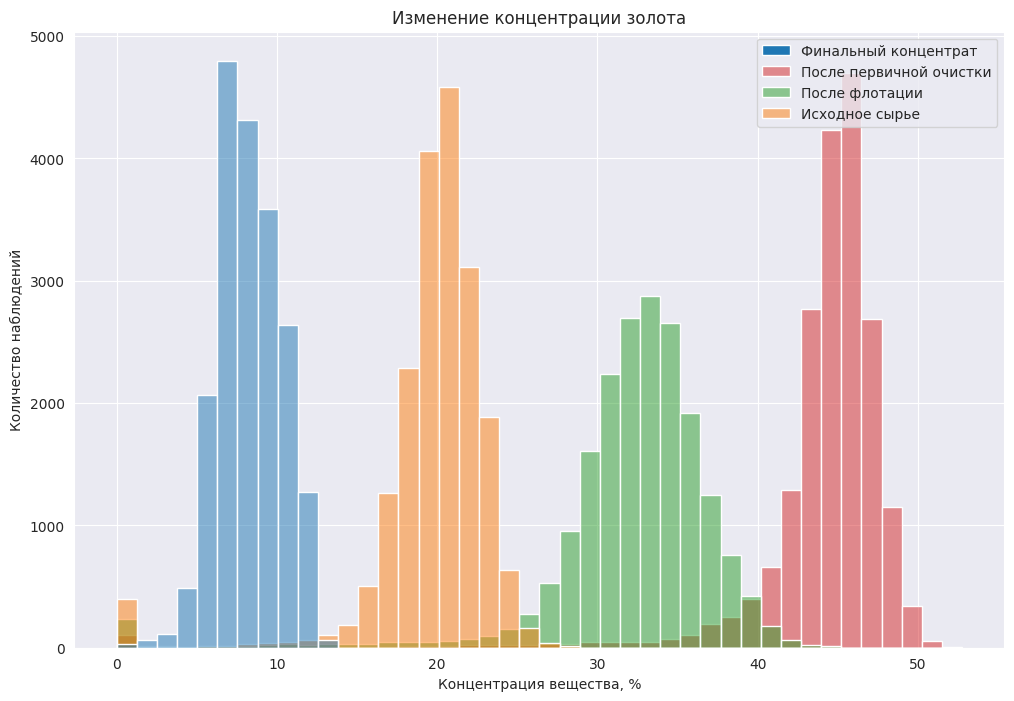

In [17]:
concentrate_au = df_full[['rougher.input.feed_au',
                          'rougher.output.concentrate_au',
                          'primary_cleaner.output.concentrate_au',
                          'final.output.concentrate_au']]

plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
ax = sns.histplot(data=concentrate_au)
plt.title('Изменение концентрации золота')
plt.legend(['Финальный концентрат',
            'После первичной очистки',
            'После флотации',
            'Исходное сырье'],
           loc='upper right')
plt.xlabel('Концентрация вещества, %')
plt.ylabel('Количество наблюдений')
plt.show()

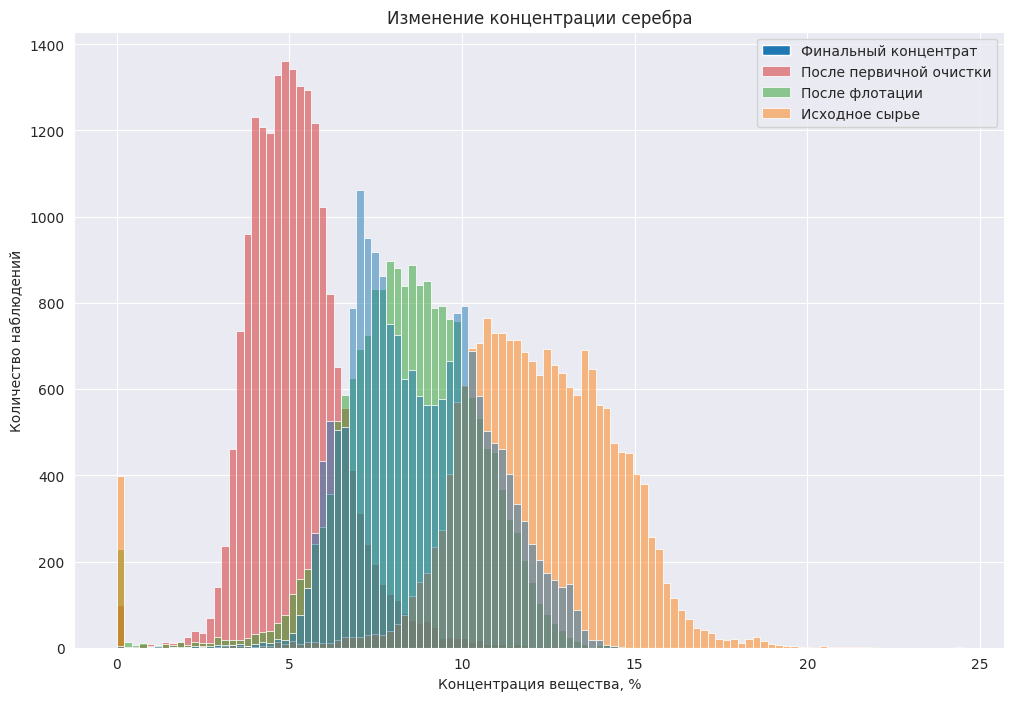

In [18]:
concentrate_ag = df_full[['rougher.input.feed_ag',
                          'rougher.output.concentrate_ag',
                          'primary_cleaner.output.concentrate_ag',
                          'final.output.concentrate_ag']]

plt.figure(figsize=(12, 8))
ax = sns.histplot(data=concentrate_ag)
plt.title('Изменение концентрации серебра')
plt.legend(['Финальный концентрат',
            'После первичной очистки',
            'После флотации',
            'Исходное сырье'],
           loc='upper right')
plt.xlabel('Концентрация вещества, %')
plt.ylabel('Количество наблюдений')
plt.show()

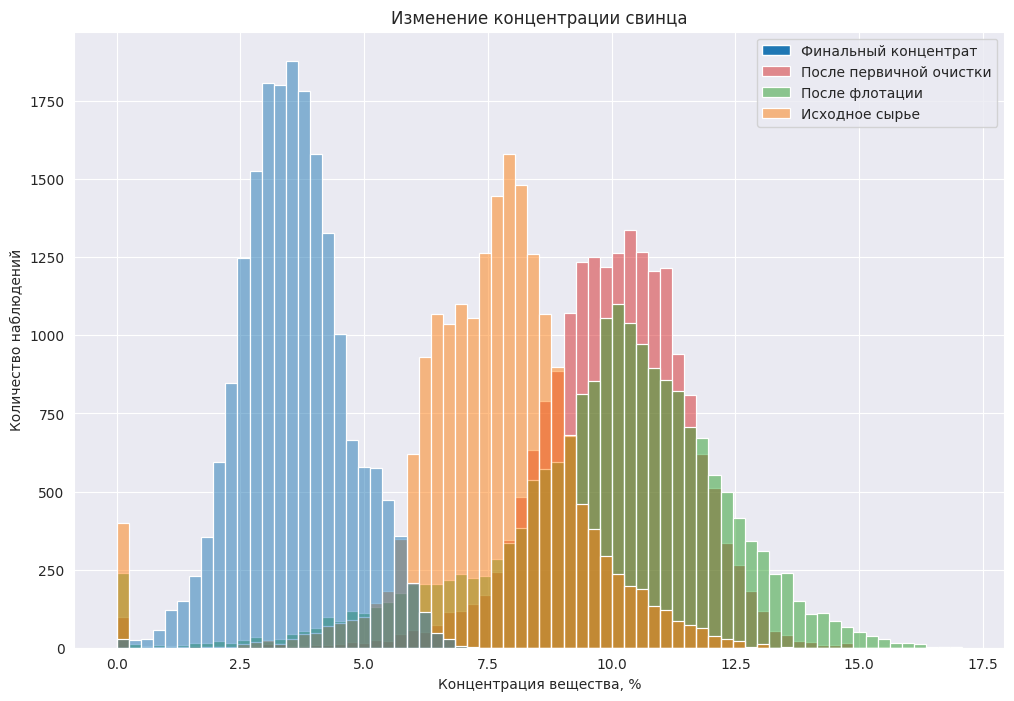

In [19]:
concentrate_pb = df_full[['rougher.input.feed_pb',
                          'rougher.output.concentrate_pb',
                          'primary_cleaner.output.concentrate_pb',
                          'final.output.concentrate_pb']]

plt.figure(figsize=(12, 8))
ax = sns.histplot(data=concentrate_pb)
plt.title('Изменение концентрации свинца')
plt.legend(['Финальный концентрат',
            'После первичной очистки',
            'После флотации',
            'Исходное сырье'],
           loc='upper right')
plt.xlabel('Концентрация вещества, %')
plt.ylabel('Количество наблюдений')
plt.show()

**Промежуточный вывод:** По данным графикам мы видим, что в ходе восстановления золота из исходного сырья концентрация золота возрастает. В конце восстановления концентрация золота составляет, примерно 45%

Концентрация серебра начинает снижаться уже на этапе первичной очистки и в финальном концентрате его концентрация составляет менее 5%

Доля свинца в финальном концентрате достигает около 10%.

На каждом распределении мы видим выбросы около нуля на этапах "После флотации" и "После первичной очистки". Эти данные обозначим, как выбросы, не входящие в межквартильный интервал, и удалим их из нашей выборки.

### Подготовим обучающую и тестовую выборки

In [20]:
def get_iqr_values(df, col):

    '''
    Функция принимает на вход датасет и наименование признака,
    по которому требуется вычислить межквартильный интервал.
    На выходе функция дает минимальное и максимальное значения
    '''

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    minimum  = q1 - 1.5 * iqr
    maximum = q3 + 1.5 * iqr

    return minimum, maximum


def remove_outliers(df, col):

    '''
    Функция принимает на вход датасет и наименование признака,
    и выводит датасет со значениями, не имеющими выбросов
    '''

    minimum, maximum = get_iqr_values(df, col)
    df_out = df.loc[(df[col] > minimum) & (df[col] < maximum)]

    return df_out

def count_outliers(df, col):

    '''
    Функция принимает на вход датасет и наименование признака,
    и считает количество выбросов
    '''

    minimum, maximum = get_iqr_values(df, col)
    df_outliers = df.loc[(df[col] <= minimum) | (df[col] >= maximum)]

    return df_outliers.shape[0]

def box_and_whisker(df, col):

    '''
    Функция строит график "Ящик с усами" для визуального
    контроля работы функций по удалению выбросов
    '''

    minimum, maximum = get_iqr_values(df, col)
    sns.boxplot(x=df[col])
    plt.title(f"minimum={minimum:.2f}, maximum={maximum:.2f}")
    plt.show()

In [21]:
print('=== В полном датасете: ===')
for i in ['au', 'ag', 'pb', 'sol']:
    print(f'Количество выбросов {i} после флотации: ', end='')
    print(count_outliers(df_full, f'rougher.output.concentrate_{i}'))
    print(f'Количество выбросов {i} в финальном концентрате: ', end='')
    print(count_outliers(df_full, f'final.output.concentrate_{i}'))
    print(f'Количество выбросов {i} после первичной очистки: ', end='')
    print(count_outliers(df_full, f'primary_cleaner.output.concentrate_{i}'))

print('=== В обучающем датасете: ===')
for i in ['au', 'ag', 'pb', 'sol']:
    print(f'Количество выбросов {i} после флотации: ', end='')
    print(count_outliers(df_train, f'rougher.output.concentrate_{i}'))
    print(f'Количество выбросов {i} в финальном концентрате: ', end='')
    print(count_outliers(df_train, f'final.output.concentrate_{i}'))
    print(f'Количество выбросов {i} после первичной очистки: ', end='')
    print(count_outliers(df_train, f'primary_cleaner.output.concentrate_{i}'))

=== В полном датасете: ===
Количество выбросов au после флотации: 855
Количество выбросов au в финальном концентрате: 1237
Количество выбросов au после первичной очистки: 867
Количество выбросов ag после флотации: 592
Количество выбросов ag в финальном концентрате: 604
Количество выбросов ag после первичной очистки: 434
Количество выбросов pb после флотации: 865
Количество выбросов pb в финальном концентрате: 476
Количество выбросов pb после первичной очистки: 837
Количество выбросов sol после флотации: 1032
Количество выбросов sol в финальном концентрате: 840
Количество выбросов sol после первичной очистки: 5
=== В обучающем датасете: ===
Количество выбросов au после флотации: 617
Количество выбросов au в финальном концентрате: 876
Количество выбросов au после первичной очистки: 695
Количество выбросов ag после флотации: 486
Количество выбросов ag в финальном концентрате: 454
Количество выбросов ag после первичной очистки: 366
Количество выбросов pb после флотации: 808
Количество выбр

In [22]:
for i in ['au', 'ag', 'pb', 'sol']:
    df_full = remove_outliers(df_full, f'rougher.output.concentrate_{i}')
    df_full = remove_outliers(df_full, f'primary_cleaner.output.concentrate_{i}')
    df_full = remove_outliers(df_full, f'final.output.concentrate_{i}')
    df_train = remove_outliers(df_train, f'rougher.output.concentrate_{i}')
    df_train = remove_outliers(df_train, f'primary_cleaner.output.concentrate_{i}')
    df_train = remove_outliers(df_train, f'final.output.concentrate_{i}')

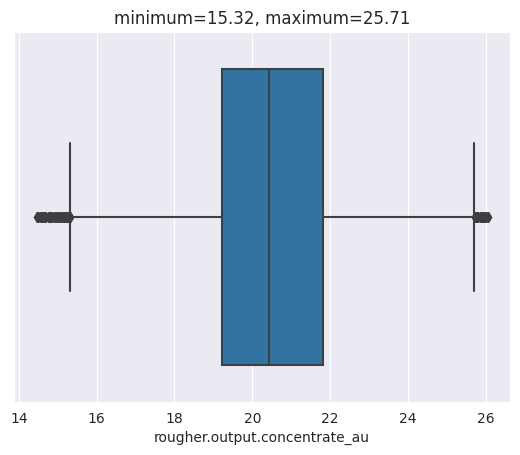

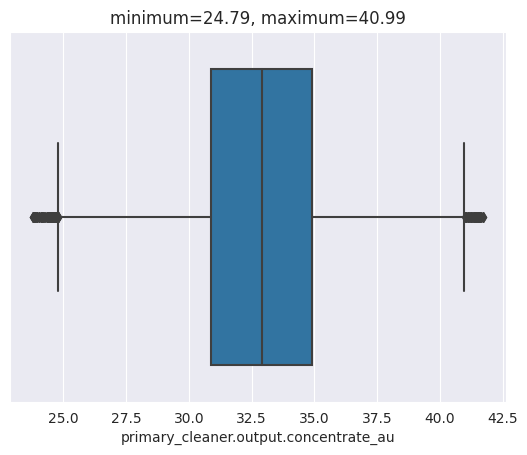

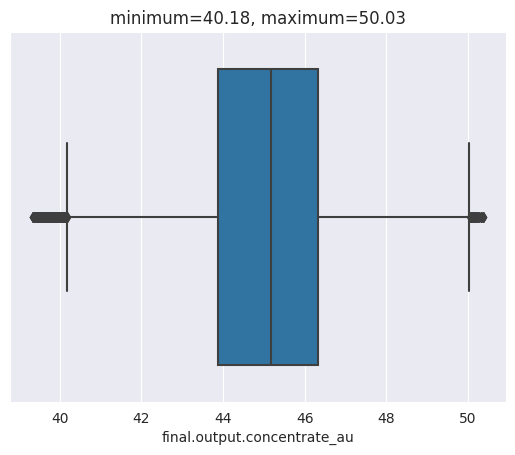

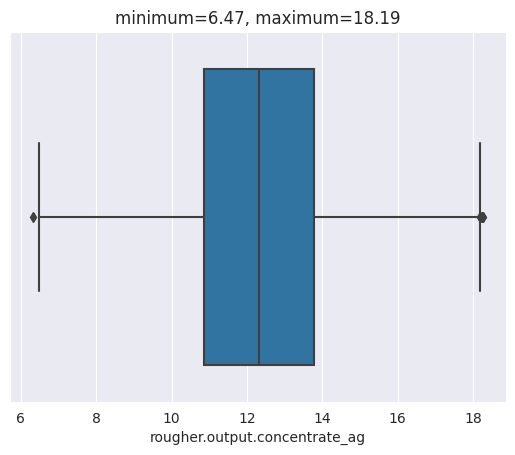

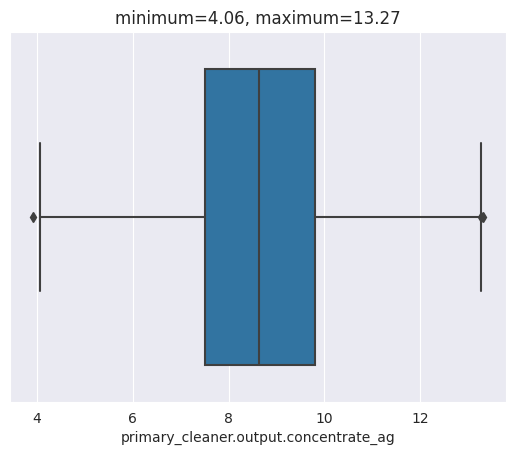

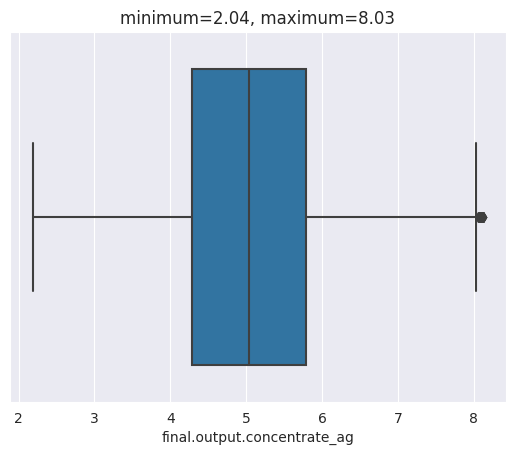

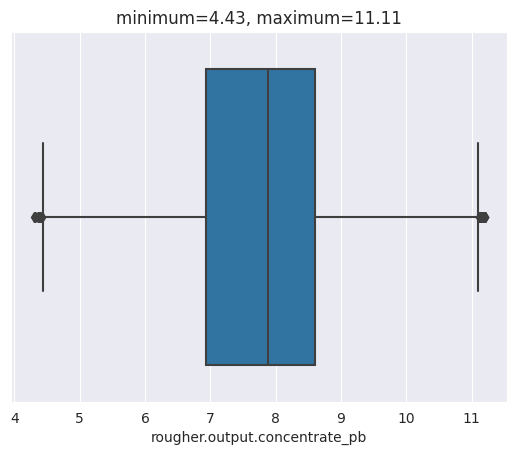

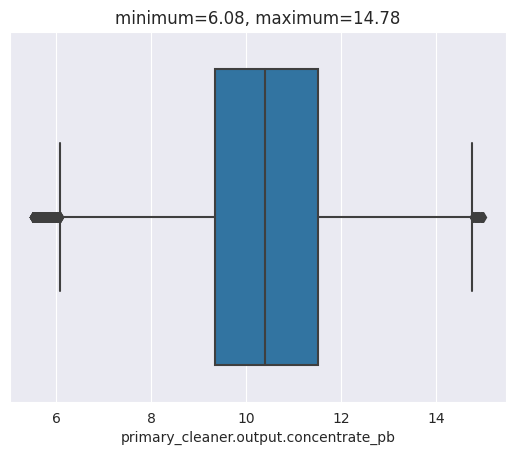

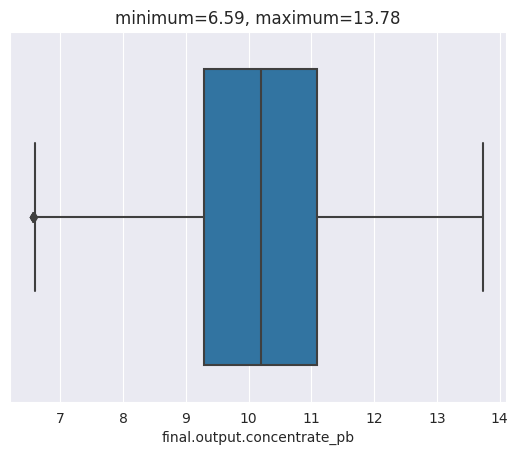

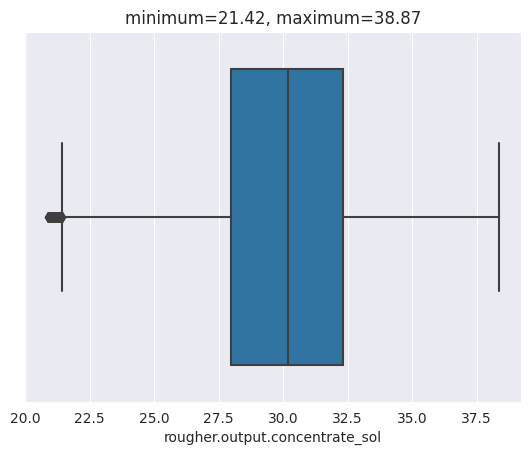

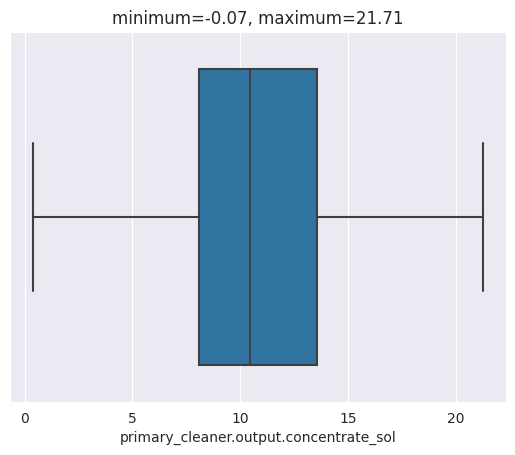

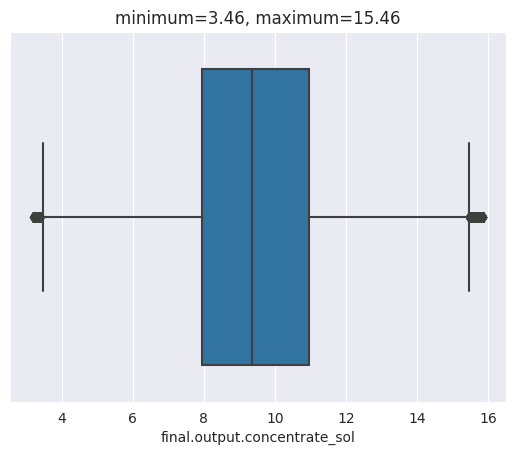

In [23]:
for i in ['au', 'ag', 'pb', 'sol']:
    box_and_whisker(df_full, f'rougher.output.concentrate_{i}')
    box_and_whisker(df_full, f'primary_cleaner.output.concentrate_{i}')
    box_and_whisker(df_full, f'final.output.concentrate_{i}')

### Сравним распределения размеров гранул сырья.

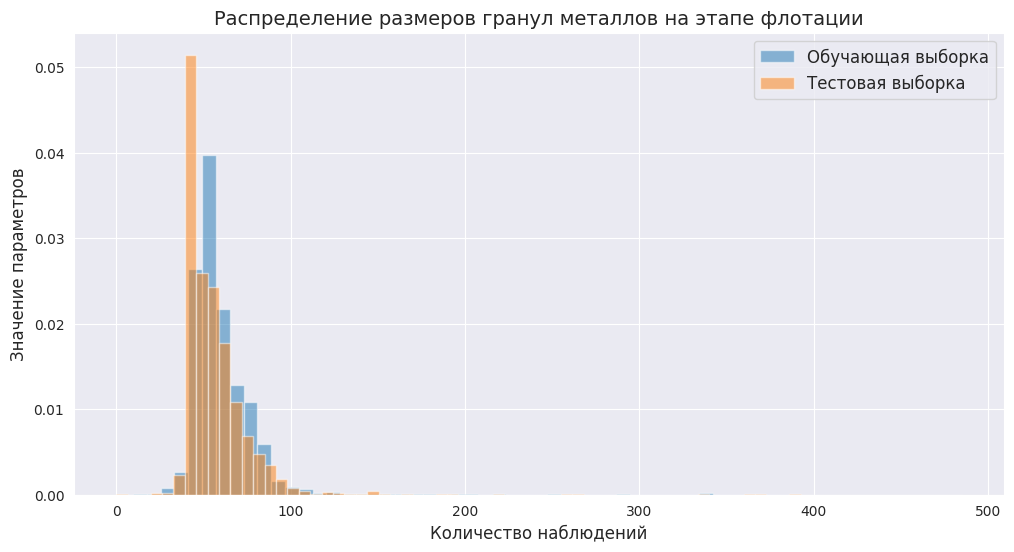

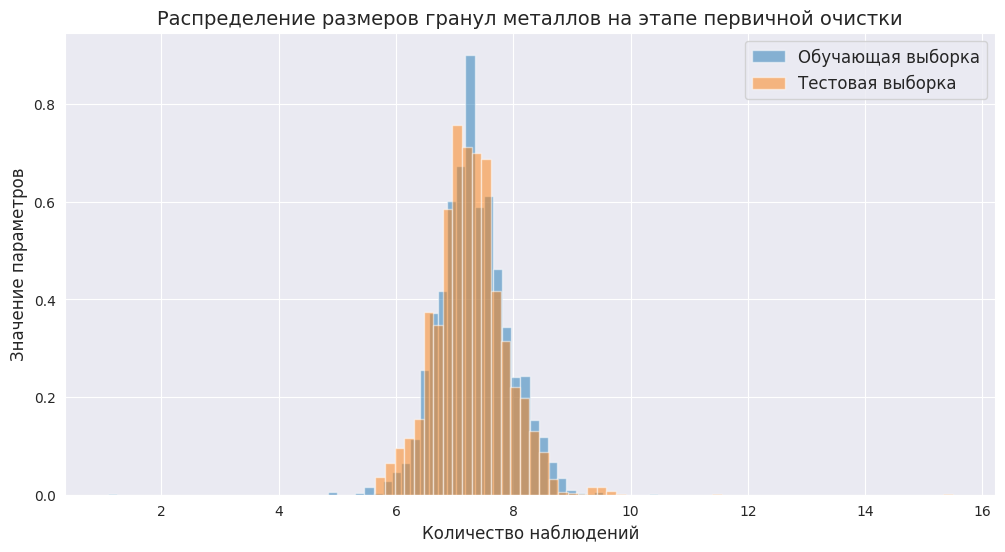

In [24]:
# Сравним распределение размеров гранул сырья на этапе флотации
df_train['rougher.input.feed_size'].hist(
    alpha=0.5,
    bins=60,
    figsize=(12, 6),
    density=True)
df_test['rougher.input.feed_size'].hist(
    alpha=0.5,
    bins=60,
    figsize=(12, 6),
    density=True)
plt.legend(['Обучающая выборка', 'Тестовая выборка'], fontsize=12)
plt.title('Распределение размеров гранул металлов на этапе флотации',
          fontsize=14)
plt.xlabel('Количество наблюдений', fontsize=12)
plt.ylabel('Значение параметров', fontsize=12)
plt.show()

# Сравним распределение размеров гранул сырья на этапе первичной очистки
df_train['primary_cleaner.input.feed_size'].hist(
    alpha=0.5,
    bins=60,
    figsize=(12, 6),
    density=True)
df_test['primary_cleaner.input.feed_size'].hist(
    alpha=0.5,
    bins=60,
    figsize=(12, 6),
    density=True)
plt.legend(['Обучающая выборка', 'Тестовая выборка'], fontsize=12)
plt.title('Распределение размеров гранул металлов на этапе первичной очистки',
          fontsize=14)
plt.xlabel('Количество наблюдений', fontsize=12)
plt.ylabel('Значение параметров', fontsize=12)
plt.show()

In [25]:
print('На этапе флотации')
print(df_train['rougher.input.feed_size'].describe())
print()
print('На этапе первичной очистки')
print(df_test['rougher.input.feed_size'].describe())

На этапе флотации
count    10158.000000
mean        60.890160
std         23.511711
min          9.659576
25%         49.652975
50%         55.568630
75%         66.660753
max        484.967466
Name: rougher.input.feed_size, dtype: float64

На этапе первичной очистки
count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64


In [26]:
print('На этапе флотации')
print(df_train['primary_cleaner.input.feed_size'].describe())
print()
print('На этапе первичной очистки')
print(df_test['primary_cleaner.input.feed_size'].describe())

На этапе флотации
count    10158.000000
mean         7.322420
std          0.592491
min          1.080000
25%          6.960000
50%          7.290000
75%          7.690000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

На этапе первичной очистки
count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64


**Промежуточный вывод:** На этапе флотации распределение размера гранул приблизительно одинаковое на тестовой и обучающей выборках, и составляет 50-55. На этапе первичной очистки - размер гранул значительно уменьшился, и составляет 7,3

### Исследуем суммарную концентрацию веществ на разных стадиях

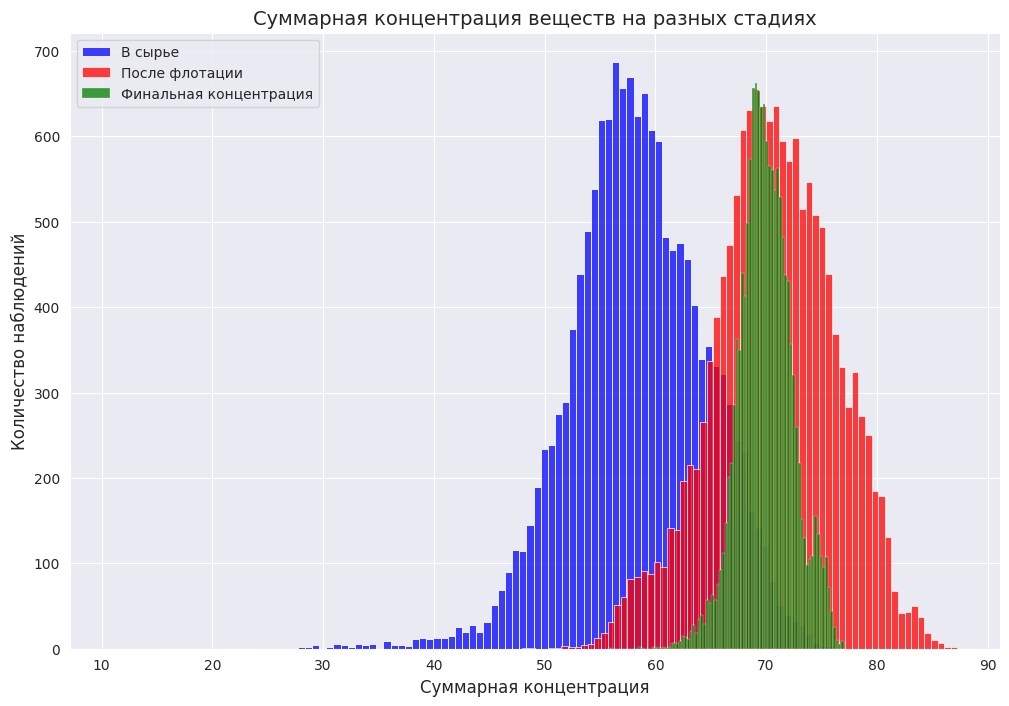

In [27]:
total_input_feed = 0
total_rougher_feed = 0
total_final_feed = 0

for i in ['au', 'ag', 'pb', 'sol']:
    total_input_feed += df_full[f'rougher.input.feed_{i}']
    total_rougher_feed += df_full[f'rougher.output.concentrate_{i}']
    total_final_feed += df_full[f'final.output.concentrate_{i}']

plt.figure(figsize=(12, 8))
sns.histplot(total_input_feed,
             label='В сырье',
             color='b',
             kde=False)
sns.histplot(total_rougher_feed,
             label='После флотации',
             color='r',
             kde=False)
sns.histplot(total_final_feed,
             label='Финальная концентрация',
             color='g',
             kde=False)
plt.title('Суммарная концентрация веществ на разных стадиях',
          fontsize=14)
plt.xlabel('Суммарная концентрация', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.legend()
plt.show()

**Промежуточный вывод:** Гистограмма показывает суммарную концентрацию веществ в концетрате на стадии исходного сырья, в черновом и финальном концентрате.

На ней видно, что суммарная концентрация веществ растет, с течением технологического процесса.

**Промежуточный вывод:** В данной части нашей работы было исследовано изменение концентраций металлов на различных этапах очистки руды. Был выявлен возрастающий тренд концентрации золота, и в конце очистки это значение составило около 45%.

На каждом распределении мы видим выбросы около нуля на этапах "После флотации" и "После первичной очистки". Эти данные обозначили, как выбросы, не входящие в межквартильный интервал. Далее мы удалили эти выбросы при помощи созданных нами функций.

Следующим пунктом было определение распределения размера гранул на тестовой и обучающей выборках, которое составляет 50-55 на этапе сырья. На этапе первичной очистки - размер гранул значительно уменьшился, и составляет 7,3

Гистограмма показывает суммарную концентрацию веществ в концетрате на стадии исходного сырья, в черновом и финальном концентрате. На ней видно, что суммарная концентрация веществ растет, с течением технологического процесса.

## Модель

### Функция вычисления итоговой sMAPE

In [28]:
def calculation_smape(y_target, y_predict):

    '''Вычисляет метрику sMAPE для каждого признака'''

    smape = 1/(len(y_target)) * sum(abs(y_target - y_predict) \
                / ((abs(y_target) + abs(y_predict)) / 2)) * 100

    return smape

In [29]:
smape_scorer = make_scorer(calculation_smape, greater_is_better = False)

In [30]:
def total_smape(rougher, final):

    '''Вычисляет итоговую метрику sMAPE'''

    total_smape = .25 * rougher + .75 * final
    return total_smape

### Выбор моделей для обучения

In [31]:
# Примем значение аргумента random_state в переменной STATE
STATE = 1234

In [32]:
# Делим данные на target и features
X_train = df_train.drop(columns=difference_train_test, axis=1)
y_train_rougher = df_train['rougher.output.recovery']
y_train_final = df_train['final.output.recovery']

# Масштабируем признаки
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#### Модель DecisionTreeRegressor

In [33]:
def dt_learn(X, y):

    best_result = 20
    best_depth = 0

    for depth in tqdm(range(2, 11, 2)):

        model = DecisionTreeRegressor(max_depth=depth,
                                      random_state=STATE)

        smape = cross_val_score(model,
                                X,
                                y,
                                scoring=smape_scorer,
                                n_jobs=-1,
                                cv=3).mean()

    if smape < best_result:
        best_result = smape
        best_depth = depth

    return smape, model

In [34]:
%%time

smape_dt_rougher, model_dt_rougher = dt_learn(X_train, y_train_rougher)
smape_dt_final, model_dt_final = dt_learn(X_train, y_train_final)
print('Лучшая модель для признака rougher:', model_dt_rougher)
print('Лучшая модель для признака final:', model_dt_final)
print(f'Наилучший показатель sMAPE: {total_smape(smape_dt_rougher, smape_dt_final) * (-1)}')

100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

Лучшая модель для признака rougher: DecisionTreeRegressor(max_depth=10, random_state=1234)
Лучшая модель для признака final: DecisionTreeRegressor(max_depth=10, random_state=1234)
Наилучший показатель sMAPE: 11.634888948483644
CPU times: user 228 ms, sys: 84 ms, total: 312 ms
Wall time: 9.75 s


#### Модель RandomForestRegressor

In [35]:
def rf_learn(X, y):

    best_result = 20
    best_estim = 0
    best_depth = 0

    for estim in range(1, 51, 10):
        for depth in tqdm(range(2, 11)):

            model = RandomForestRegressor(n_estimators=estim,
                                          max_depth=depth,
                                          n_jobs=-1,
                                          random_state=STATE)

            smape = cross_val_score(model,
                                    X,
                                    y,
                                    scoring=smape_scorer,
                                    n_jobs=-1,
                                    cv=3).mean()

    if smape < best_result:
        best_result = smape
        best_depth = depth

    return smape, model

In [36]:
%%time

smape_rf_rougher, model_rf_rougher = rf_learn(X_train, y_train_rougher)
smape_rf_final, model_rf_final = rf_learn(X_train, y_train_final)
print(f'Лучшая модель для признака rougher: {model_rf_rougher}')
print(f'Лучшая модель для признака final: {model_rf_final}')
print(f'Наилучший показатель sMAPE: {total_smape(smape_rf_rougher, smape_rf_final) * (-1)}')

100%|██████████| 9/9 [02:16<00:00, 15.20s/it]

Лучшая модель для признака rougher: RandomForestRegressor(max_depth=10, n_estimators=41, n_jobs=-1,
                      random_state=1234)
Лучшая модель для признака final: RandomForestRegressor(max_depth=10, n_estimators=41, n_jobs=-1,
                      random_state=1234)
Наилучший показатель sMAPE: 9.289238706287815
CPU times: user 4.69 s, sys: 709 ms, total: 5.4 s
Wall time: 11min 44s


#### Модель Lasso

In [37]:
%%time

model_lr_rougher = Lasso()

smape_rougher = cross_val_score(model_lr_rougher,
                                X_train,
                                y_train_rougher,
                                scoring=smape_scorer,
                                cv=3).mean()

model_lr_final = Lasso()

smape_final = cross_val_score(model_lr_final,
                              X_train,
                              y_train_final,
                              scoring=smape_scorer,
                              cv=3).mean()

result_smape = total_smape(smape_rougher, smape_final) * (-1)

print(f'Наилучший показатель sMAPE у модели {model_lr_final}: {result_smape}')

Наилучший показатель sMAPE у модели Lasso(): 8.656480198796302
CPU times: user 123 ms, sys: 145 ms, total: 268 ms
Wall time: 147 ms


**Промежуточный вывод:** В ходе исследования мы обучили три разных модели с перебором гиперпараметров. Получили лучшие показатели метрики sMAPE и выбрали лучшую модель

### Проверка лучшей модели на тестовой выборке

In [38]:
# Делим данные на target и features
X_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_test_rougher = df_test['rougher.output.recovery']
y_test_final = df_test['final.output.recovery']

# Масштабируем признаки
X_test = scaler.transform(X_test)

In [41]:
%%time

model_lr_rougher.fit(X_train, y_train_rougher)
model_lr_final.fit(X_train, y_train_final)

rougher_test_predict = model_lr_rougher.predict(X_test)
final_test_predict = model_lr_final.predict(X_test)

smape_rougher_test = calculation_smape(y_test_rougher, rougher_test_predict)
smape_final_test = calculation_smape(y_test_final, final_test_predict)

result_smape = total_smape(smape_rougher_test, smape_final_test)

print(f'Наилучший показатель sMAPE: {result_smape}')

Наилучший показатель sMAPE: 8.540513137533177
CPU times: user 43.9 ms, sys: 21.8 ms, total: 65.7 ms
Wall time: 39.3 ms


### Проверка на адекватность

In [40]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_final = DummyRegressor(strategy="mean")

dummy_rougher.fit(X_train, y_train_rougher)
dummy_final.fit(X_train, y_train_final)

dummy_predicted_rougher = dummy_rougher.predict(X_test)
dummy_predicted_final = dummy_final.predict(X_test)

smape_const_rougher = calculation_smape(y_test_rougher, dummy_predicted_rougher)
smape_const_final = calculation_smape(y_test_final, dummy_predicted_final)

final_smape_const = total_smape(smape_const_rougher, smape_const_final)
print(f'Показатель sMAPE у модели: {final_smape_const}')

Показатель sMAPE у модели: 9.559879313402169


## Вывод

В ходе проведенного исследования нам были предоставлены обучающий, тестовый и полный датасеты от условной золотодобывающей компании для подготовки прототипа модели машинного обучения.

По окончании работы наша модель должна предсказывать коэффициент восстановления золота из золотодобывающей руды. В дальнейшем, модель должна оптимизировать производство.

1. На первом этапе мы загрузили необходимые для работы библиотеки, а также сохранили в переменные данные, предоставленные компанией-заказчиком. Проверили правильность формулы расчета эффективности обогащения руды. Оптимизировали признаки в обучающей и тестовой выборках и произвели предобработку данных
2. На втором этапе работы, мы исследовали изменение концентрации металлов на различных этапах очистки, выявили аномальные значения в данных и удалили их. Сравнили распределения размеров гранул, чтобы оценить будет ли модель правильно предсказывать.
3. На третьем этапе определили функцию для подсчета метрики sMAPE (симметричное среднее абсолютное процентное отклонение). Обучили три разные модели на обучающей выборке с перебором гиперпараметров. Для каждой модели определили лучший результат. Затем, лучшую модель проверили на тестовой выборке и сопоставили с результатами на обучающей. А также проверили адекватность нашей модели с помощью сравнения с константной модели

Таким образом, мы выявили наиболее качественной модель Lasso для машинного обучения. Она дала нам результат метрики sMAPE, равный 8,66 на обучающей выборке, и 8,54 на тестовой. При этом константная модель показала результат 9,56